importing the dependancies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import os
import time
import numpy as np
import shutil
import random

# Set the root directo/content/drive/MyDrive/new/BoneFractureDataset/trainingries
root_dir = '/content/drive/MyDrive/New folder (3)/'
new_root = '/content/alldatasets/'
classes = ['Avulsion fracture/Avulsion fracture',
           'Comminuted fracture/Comminuted fracture',
           'Compression-Crush fracture/Compression-Crush fracture',
           'Hairline Fracture/Hairline Fracture',
           'Impacted fracture/Impacted fracture',
           'Intra-articular fracture/Intra-articular fracture',
           'Longitudinal fracture/Longitudinal fracture',
           'Oblique fracture/Oblique fracture',
           'Pathological fracture/Pathological fracture',
           'Spiral Fracture/Spiral Fracture',
           'Fracture Dislocation/Fracture Dislocation']

# Create train, validation, and test directories for each class
for cls in classes:
    train_dir = root_dir + new_root + 'train/' + cls
    val_dir = root_dir + new_root + 'val/' + cls
    test_dir = root_dir + new_root + 'test/' + cls

    if not os.path.exists(train_dir):
       os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Shuffle and partition the data for each class
    src = root_dir + '/' + cls  # Folder to copy images from
    print(src)
    allFileNames = os.listdir(src)
    random.shuffle(allFileNames)

    # Split the data into training, validation, and testing sets
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * 0.75), int(len(allFileNames) * 0.95)])

    # Convert file names from array to list
    train_FileNames = [src + '/' + name for name in train_FileNames]
    val_FileNames = [src + '/' + name for name in val_FileNames]
    test_FileNames = [src + '/' + name for name in test_FileNames]

    print('Total images for ' + cls + ': ' + str(len(allFileNames)))
    print('Training images for ' + cls + ': ' + str(len(train_FileNames)))
    print('Validation images for ' + cls + ': ' + str(len(val_FileNames)))
    print('Testing images for ' + cls + ': ' + str(len(test_FileNames)))

    # Copy partitioned images to the respective directories
    for name in train_FileNames:
        shutil.copy(name, root_dir + new_root + 'train/' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir + new_root + 'val/' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_dir + new_root + 'test/' + cls)


/content/drive/MyDrive/New folder (3)//Avulsion fracture/Avulsion fracture
Total images for Avulsion fracture/Avulsion fracture: 141
Training images for Avulsion fracture/Avulsion fracture: 105
Validation images for Avulsion fracture/Avulsion fracture: 28
Testing images for Avulsion fracture/Avulsion fracture: 8
/content/drive/MyDrive/New folder (3)//Comminuted fracture/Comminuted fracture
Total images for Comminuted fracture/Comminuted fracture: 219
Training images for Comminuted fracture/Comminuted fracture: 164
Validation images for Comminuted fracture/Comminuted fracture: 44
Testing images for Comminuted fracture/Comminuted fracture: 11
/content/drive/MyDrive/New folder (3)//Compression-Crush fracture/Compression-Crush fracture
Total images for Compression-Crush fracture/Compression-Crush fracture: 150
Training images for Compression-Crush fracture/Compression-Crush fracture: 112
Validation images for Compression-Crush fracture/Compression-Crush fracture: 30
Testing images for Comp

In [ ]:
!pip install PrettyTable
from prettytable import PrettyTable
import os
import numpy as np
import random

# Assume you have defined 'classes' and 'root_dir' before this code block

# Create a PrettyTable for displaying the results
result_table = PrettyTable()
result_table.field_names = ["Class", "Total Images", "Training Images", "Validation Images", "Testing Images"]

# Variables to store the sum of each column
total_images_sum = 0
training_images_sum = 0
validation_images_sum = 0
testing_images_sum = 0

# Populate the table with information
for cls in classes:
    train_dir = root_dir + new_root + 'train/' + cls
    val_dir = root_dir + new_root + 'val/' + cls
    test_dir = root_dir + new_root + 'test/' + cls

    # Shuffle and partition the data for each class
    src = root_dir + '/' + cls
    allFileNames = os.listdir(src)
    random.shuffle(allFileNames)

    # Split the data into training, validation, and testing sets
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * 0.75), int(len(allFileNames) * 0.95)])

    # Convert file names from array to list
    train_FileNames = [src + '/' + name for name in train_FileNames]
    val_FileNames = [src + '/' + name for name in val_FileNames]
    test_FileNames = [src + '/' + name for name in test_FileNames]

    total_images = len(allFileNames)
    training_images = len(train_FileNames)
    validation_images = len(val_FileNames)
    testing_images = len(test_FileNames)

    total_images_sum += total_images
    training_images_sum += training_images
    validation_images_sum += validation_images
    testing_images_sum += testing_images

    print(f'Total images for {cls}: {total_images}')
    print(f'Training images for {cls}: {training_images}')
    print(f'Validation images for {cls}: {validation_images}')
    print(f'Testing images for {cls}: {testing_images}')

    # Add row to the PrettyTable
    result_table.add_row([cls, total_images, training_images, validation_images, testing_images])

# Add a row for the sums
result_table.add_row(["Sum", total_images_sum, training_images_sum, validation_images_sum, testing_images_sum])

# Print the PrettyTable
print(result_table)



Total images for Avulsion fracture/Avulsion fracture: 141
Training images for Avulsion fracture/Avulsion fracture: 105
Validation images for Avulsion fracture/Avulsion fracture: 28
Testing images for Avulsion fracture/Avulsion fracture: 8
Total images for Comminuted fracture/Comminuted fracture: 219
Training images for Comminuted fracture/Comminuted fracture: 164
Validation images for Comminuted fracture/Comminuted fracture: 44
Testing images for Comminuted fracture/Comminuted fracture: 11
Total images for Compression-Crush fracture/Compression-Crush fracture: 150
Training images for Compression-Crush fracture/Compression-Crush fracture: 112
Validation images for Compression-Crush fracture/Compression-Crush fracture: 30
Testing images for Compression-Crush fracture/Compression-Crush fracture: 8
Total images for Hairline Fracture/Hairline Fracture: 139
Training images for Hairline Fracture/Hairline Fracture: 104
Validation images for Hairline Fracture/Hairline Fracture: 28
Testing image

In [ ]:
train_dir='/content/drive/MyDrive/New folder (3)/content/alldatasets/train/'
test_dir='/content/drive/MyDrive/New folder (3)/content/alldatasets/test/'
val_dir='/content/drive/MyDrive/New folder (3)/content/alldatasets/val/'

In [ ]:
 train_generator = ImageDataGenerator(
                            rotation_range= 20,
                            width_shift_range=0.25,
                            height_shift_range=0.25,
                            rescale= 1./255,
                            shear_range= 0.25,
                            zoom_range= 0.25,
                            horizontal_flip= True,
                            fill_mode= 'nearest'
                              )

In [ ]:
 train_generator = ImageDataGenerator(
     rotation_range= 20,
      rescale= 1./255,
        )

In [ ]:
classes = ['Avulsion fracture',
           'Comminuted fracture',
           'Compression-Crush fracture',
           'Hairline Fracture',
           'Impacted fracture',
           'Intra-articular fracture',
           'Longitudinal fracture',
           'Oblique fracture',
           'Pathological fracture',
           'Spiral Fracture',
           'Fracture Dislocation'
              ]

In [ ]:
train_set = DirectoryIterator(train_dir,
                              train_generator,
                              target_size = (224, 224),
                              color_mode = 'rgb',
                              batch_size = 16,
                              classes = classes,
                              class_mode = 'categorical'
                              )

Found 1528 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the test data generator
test_generator = ImageDataGenerator(rescale=1./255)

# Use the test data generator in the DirectoryIterator
test_set = DirectoryIterator(test_dir,
                             test_generator,
                             target_size=(224, 224),
                             color_mode='rgb',
                             batch_size=16,
                             classes=classes,
                             class_mode='categorical'
                            )


Found 873 images belonging to 11 classes.


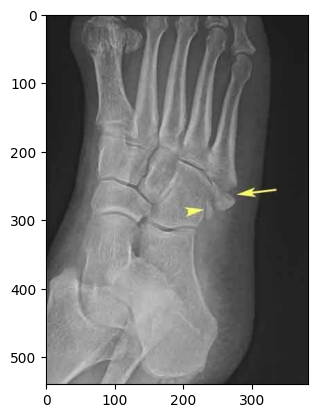

In [ ]:
import cv2
import matplotlib.pyplot as plt

testfiles = test_set.filenames  # Assuming test_set has been defined earlier
pp = cv2.imread('/content/drive/MyDrive/New folder (3)/' + testfiles[5])
im_rgb = cv2.cvtColor(pp, cv2.COLOR_BGR2RGB)  # Corrected function name

plt.imshow(im_rgb)

In [ ]:
testfiles[132]

'Comminuted fracture/Comminuted fracture/image27.jpeg'

In [ ]:
import tensorflow as tf
import argparse
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools
from sklearn.utils import class_weight

In [ ]:
class_weight=class_weight.compute_class_weight('balanced',
classes= np.unique(train_set.classes),
         y =  train_set.classes)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming train_set.classes is an array of class labels
class_labels = np.unique(train_set.classes)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=train_set.classes)
cls_wt_dict = dict(enumerate(class_weights))
print(cls_wt_dict)


{0: 1.0213903743315509, 1: 0.6430976430976431, 2: 0.9449598021026593, 3: 1.0523415977961432, 4: 0.873642081189251, 5: 1.780885780885781, 6: 1.1480090157776108, 7: 1.1480090157776108, 8: 1.0937723693629204, 9: 1.0366350067842605, 10: 0.8847712796757383}


In [ ]:
class_weight=cls_wt_dict

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Model, Sequential  # Corrected import for Model and Sequential
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Activation, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers  # Corrected import for regularizers

import keras.backend as K  # Corrected import for K
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix  # Corrected import for confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from IPython.display import Image, HTML  # Corrected import for Image
from tensorflow.keras.utils import plot_model

In [ ]:
class Modelnew:
  @staticmethod
  def build(classes):
    base_model = tensorflow.keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet")
    for layer in base_model.layers[:-9]:
      layer.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))  # Corrected dense layer definition
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))  # Corrected dense layer definition
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(11, activation='softmax'))
    # Compiling the model
    return model



In [ ]:
import tensorflow as tf

def create_model():
    # Load pre-trained ResNet50V2 model
    resnet_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze the layers of the pre-trained model
    for layer in resnet_model.layers:
        layer.trainable = False

    # Global average pooling layer
    x = resnet_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Dense layers for classification
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), bias_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Output layer for multi-class classification (11 classes)
    predictions = tf.keras.layers.Dense(11, activation='softmax')(x)

    # Create the model
    res_model = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

    # Compile the model for multi-class classification
    res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return res_model





In [ ]:
res_model=create_model()

94668760/94668760 [==============================] - 4s 0us/step


In [ ]:
 lr = 0.001
import tensorflow.keras
from tensorflow.keras import optimizers
comms_round = 2
loss = 'categorical_crossentropy'  # Corrected spelling of 'categorical_crossentropy'
metrics = ['accuracy']
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Corrected optimizer

In [ ]:

new= Modelnew()
mnew= new.build(11)
mnew.compile(loss=loss,
             optimizer=optimizer,
             metrics= metrics)


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
history=mnew.fit_generator(steps_per_epoch=1,
                           generator=train_set,
                           validation_steps=1,
                           epochs=1000)

<ipython-input-24-9d98ec923a89>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=mnew.fit_generator(steps_per_epoch=1,


Epoch 1/1000
1/1 [==============================] - 21s 21s/step - loss: 3.3337 - accuracy: 0.1250
Epoch 2/1000
1/1 [==============================] - 1s 872ms/step - loss: 4.1058 - accuracy: 0.1250
Epoch 3/1000
1/1 [==============================] - 4s 4s/step - loss: 3.8889 - accuracy: 0.1250
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 3.6561 - accuracy: 0.0625
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 4.5794 - accuracy: 0.1250
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 3.8799 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 1s 931ms/step - loss: 3.9705 - accuracy: 0.0625
Epoch 8/1000
1/1 [==============================] - 7s 7s/step - loss: 4.0571 - accuracy: 0.0625
Epoch 9/1000
1/1 [==============================] - 3s 3s/step - loss: 4.3167 - accuracy: 0.1250
Epoch 10/1000
1/1 [==============================] - 0s 448ms/step - loss: 3.1236 - accuracy: 0.2500
Epoch 11/1000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 4s 4s/step - loss: 3.7110 - accuracy: 0.2500
Epoch 12/1000
1/1 [==============================] - 2s 2s/step - loss: 3.7900 - accuracy: 0.1250
Epoch 13/1000
1/1 [==============================] - 1s 1s/step - loss: 4.0645 - accuracy: 0.0000e+00
Epoch 14/1000
1/1 [==============================] - 2s 2s/step - loss: 3.9866 - accuracy: 0.0625
Epoch 15/1000
1/1 [==============================] - 1s 1s/step - loss: 3.2299 - accuracy: 0.1875
Epoch 16/1000
1/1 [==============================] - 2s 2s/step - loss: 3.8656 - accuracy: 0.1250
Epoch 17/1000
1/1 [==============================] - 1s 1s/step - loss: 3.9441 - accuracy: 0.0000e+00
Epoch 18/1000
1/1 [==============================] - 2s 2s/step - loss: 4.0987 - accuracy: 0.0000e+00
Epoch 19/1000
1/1 [==============================] - 1s 912ms/step - loss: 3.4447 - accuracy: 0.1875
Epoch 20/1000
1/1 [==============================] - 2s 2s/step - loss: 3.4371 - accuracy: 0.1250
Epoch 21/1000
1/1 [

In [ ]:
history1=res_model.fit_generator(steps_per_epoch=1,
                           generator=train_set,
                           validation_steps=1,
                           epochs=1000)

<ipython-input-25-1255fb17b7a3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=res_model.fit_generator(steps_per_epoch=1,


Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 3.4096 - accuracy: 0.1250
Epoch 2/1000
1/1 [==============================] - 1s 684ms/step - loss: 3.9812 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 490ms/step - loss: 3.3636 - accuracy: 0.1875
Epoch 4/1000
1/1 [==============================] - 0s 325ms/step - loss: 4.1466 - accuracy: 0.0625
Epoch 5/1000
1/1 [==============================] - 0s 358ms/step - loss: 3.2595 - accuracy: 0.1250
Epoch 6/1000
1/1 [==============================] - 0s 374ms/step - loss: 2.6409 - accuracy: 0.1875
Epoch 7/1000
1/1 [==============================] - 0s 447ms/step - loss: 2.8510 - accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 329ms/step - loss: 2.7908 - accuracy: 0.1250
Epoch 9/1000
1/1 [==============================] - 0s 363ms/step - loss: 3.1852 - accuracy: 0.1875
Epoch 10/1000
1/1 [==============================] - 0s 356ms/step - loss: 3.5185 - accuracy: 0.000

Training time for mnew: 2.0503997802734375e-05 seconds
Training time for res_model: 2.2172927856445312e-05 seconds


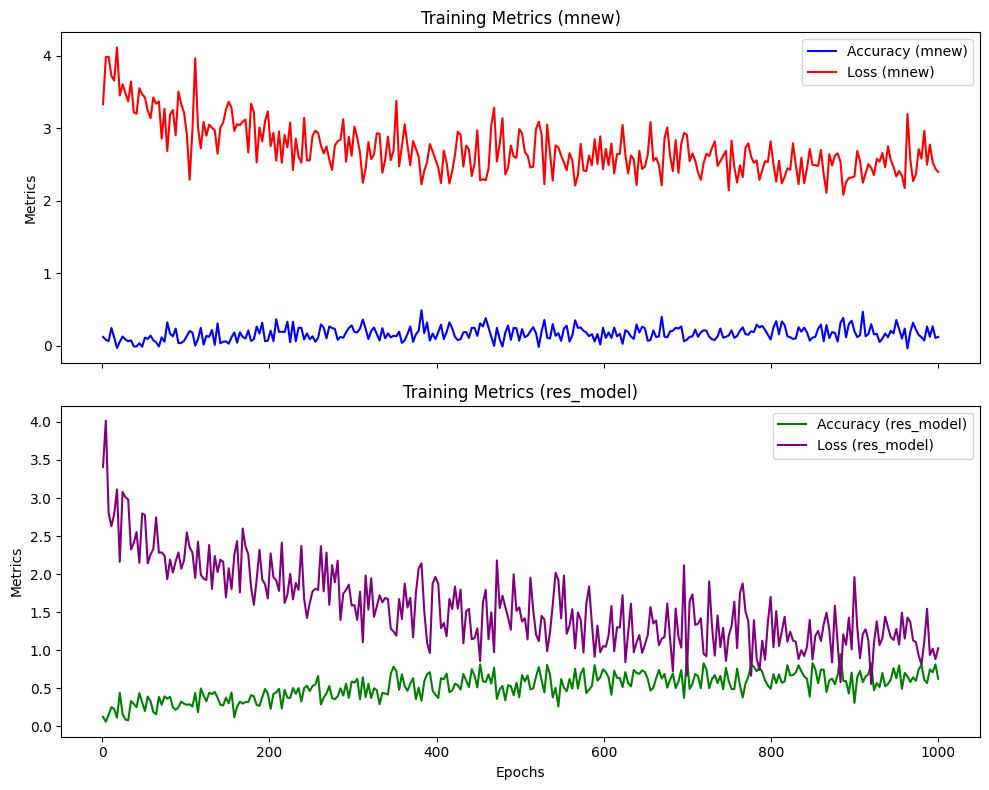

In [ ]:
import matplotlib.pyplot as plt
from datetime import timedelta
import time
from scipy.interpolate import make_interp_spline
import numpy as np

# Assuming you have defined history and history1 objects for both models

# Record the start time for mnew
start_time_mnew = time.time()

# Training code for mnew

# Record the end time for mnew
end_time_mnew = time.time()
training_time_mnew = end_time_mnew - start_time_mnew
print("Training time for mnew:", training_time_mnew, "seconds")

# Record the start time for res_model
start_time_res_model = time.time()

# Training code for res_model

# Record the end time for res_model
end_time_res_model = time.time()
training_time_res_model = end_time_res_model - start_time_res_model
print("Training time for res_model:", training_time_res_model, "seconds")

# Format the training times using timedelta
formatted_time_mnew = str(timedelta(seconds=training_time_mnew))
formatted_time_res_model = str(timedelta(seconds=training_time_res_model))

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # 2 rows, 1 column with shared x-axis

# Smoothing the data for better visualization with a higher smoothness parameter
x_smooth = np.linspace(1, len(history.history['accuracy']), 300)  # Generate denser x values
acc_smooth_mnew = make_interp_spline(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], k=3)
loss_smooth_mnew = make_interp_spline(range(1, len(history.history['loss']) + 1), history.history['loss'], k=3)
acc_smooth_res_model = make_interp_spline(range(1, len(history1.history['accuracy']) + 1), history1.history['accuracy'], k=3)
loss_smooth_res_model = make_interp_spline(range(1, len(history1.history['loss']) + 1), history1.history['loss'], k=3)

# Plotting accuracy and loss for mnew with smoothed lines
axes[0].plot(x_smooth, acc_smooth_mnew(x_smooth), label='Accuracy (mnew)', color='blue')
axes[0].plot(x_smooth, loss_smooth_mnew(x_smooth), label='Loss (mnew)', color='red')
axes[0].set_title('Training Metrics (mnew)')
axes[0].set_ylabel('Metrics')
axes[0].legend()

# Plotting accuracy and loss for res_model with smoothed lines
axes[1].plot(x_smooth, acc_smooth_res_model(x_smooth), label='Accuracy (res_model)', color='green')
axes[1].plot(x_smooth, loss_smooth_res_model(x_smooth), label='Loss (res_model)', color='purple')
axes[1].set_title('Training Metrics (res_model)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Metrics')
axes[1].legend()

plt.tight_layout()  # Ensures proper spacing
plt.show()



In [ ]:
history1.history
acc = history1.history['accuracy']
loss = history1.history['loss']

Training time: 0:00:00.000021


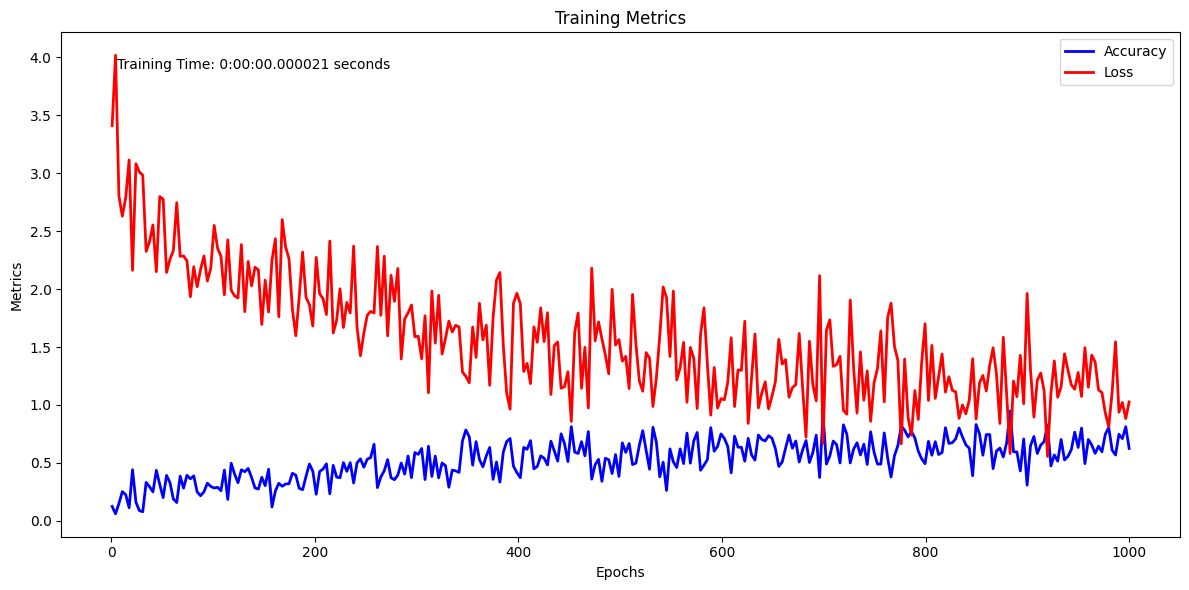

In [ ]:
import matplotlib.pyplot as plt
from datetime import timedelta
import time
from scipy.interpolate import make_interp_spline
import numpy as np

# Assuming you have defined acc and loss arrays

# Record the start time
start_time = time.time()

# Training code

# Record the end time
end_time = time.time()
training_time = end_time - start_time

# Format the training time using timedelta
formatted_time = str(timedelta(seconds=training_time))
print("Training time:", formatted_time)

fig, ax = plt.subplots(figsize=(12, 6))  # Single plot

# Smoothing the data for better visualization with a higher smoothness parameter
x_smooth = np.linspace(1, len(acc), 300)  # Generate denser x values
epochs_smooth = make_interp_spline(range(1, len(acc) + 1), acc, k=3)  # Increase k for even smoother curve
loss_smooth = make_interp_spline(range(1, len(loss) + 1), loss, k=3)  # Increase k for even smoother curve

# Plotting accuracy with a bolded line
ax.plot(x_smooth, epochs_smooth(x_smooth), label='Accuracy', color='blue', linewidth=2)

# Plotting loss with a bolded line
ax.plot(x_smooth, loss_smooth(x_smooth), label='Loss', color='red', linewidth=2)

ax.set_title('Training Metrics')
ax.set_xlabel('Epochs')
ax.set_ylabel('Metrics')
ax.legend()
ax.text(0.05, 0.95, f'Training Time: {formatted_time} seconds', transform=ax.transAxes, ha='left', va='top')

plt.tight_layout()  # Ensures proper spacing
plt.show()




In [ ]:
# Assuming you have a train set named train_set
# Replace 'mnew' with the actual variable name of your model
train_results = mnew.evaluate_generator(train_set, steps=len(train_set))

# Extract and print different evaluation metrics
loss = train_results[mnew.metrics_names.index('loss')]
accuracy = train_results[mnew.metrics_names.index('accuracy')]


print(f'Training Loss: {loss:.4f}')
print(f'Training Accuracy: {accuracy:.2%}')



<ipython-input-29-a9d7587d2902>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_results = mnew.evaluate_generator(train_set, steps=len(train_set))


Training Loss: 2.6133
Training Accuracy: 15.12%


In [ ]:
# Assuming you have a train set named train_set
# Replace 'mnew' with the actual variable name of your model
train_results = res_model.evaluate_generator(train_set, steps=len(train_set))

# Extract and print different evaluation metrics
loss = train_results[res_model.metrics_names.index('loss')]
accuracy = train_results[res_model.metrics_names.index('accuracy')]


print(f'Training Loss: {loss:.4f}')
print(f'Training Accuracy: {accuracy:.2%}')



<ipython-input-30-b709656b6d5c>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_results = res_model.evaluate_generator(train_set, steps=len(train_set))


Training Loss: 0.9460
Training Accuracy: 72.64%


In [ ]:
feature_extractor= res_model.predict(train_set)

96/96 [==============================] - 34s 341ms/step


In [ ]:
extract= Model(res_model.inputs, res_model.layers[-1].output)


In [ ]:
fx=extract.predict(train_set)

96/96 [==============================] - 31s 319ms/step


In [ ]:
mnew.layers[-1].output

<KerasTensor: shape=(None, 11) dtype=float32 (created by layer 'dense_5')>

In [ ]:
extract1= Model(mnew.inputs, mnew.layers[-1].output)


In [ ]:
mnew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [ ]:
fx1=extract1.predict(train_set)

96/96 [==============================] - 31s 324ms/step


In [ ]:
# remember to start the code from here when needed to reshape the length of variable aa
aa= train_set.labels

In [ ]:
print(aa)

[ 0  0  0 ... 10 10 10]


In [ ]:
len(aa)

1528

In [ ]:
fullfeat=[]
for j in range(0,len(aa)):
  allfeat=np.concatenate([fx[j],fx1[j]])
  fullfeat.append(allfeat)


In [ ]:
np.array(fullfeat).shape

(1528, 22)

In [ ]:
print("Shape of fullfeat:", np.array(fullfeat).shape)
print("Length of aa:", len(aa))


Shape of fullfeat: (1528, 22)
Length of aa: 1528


In [ ]:

length_aa = len(aa)
print("Length of aa:", length_aa)

# Reshape 'aa' only if its length matches 1523
if length_aa == 1528:
    aa_reshaped = np.reshape(aa, (1528,))
    print("Shape of aa_reshaped:", aa_reshaped.shape)
else:
    print("Length of 'aa' is not 1552. Cannot reshape.")



Length of aa: 1528
Shape of aa_reshaped: (1528,)


In [ ]:
taa= test_set.labels

In [ ]:
len(taa)

873

In [ ]:
length_taa = len(taa)
print("Length of taa:", length_taa)

# Reshape 'taa' only if its length matches 374
if length_taa==873:
   taa_reshaped = np.reshape(taa, (873,))
   print("Shape of taa_reshaped:", taa_reshaped.shape)
else:
    print("Length of 'taa' is not 873. Cannot reshape.")



Length of taa: 873
Shape of taa_reshaped: (873,)


In [ ]:
tfx= extract.predict(test_set)
tfx1= extract1.predict(test_set)
tfullfeat=[]
for j in range(0,len(taa)):
  tallfeat=np.concatenate([tfx[j],tfx1[j]])
  tfullfeat.append(tallfeat)






55/55 [==============================] - 11s 203ms/step


In [ ]:
print("Shape of fullfeat:", np.array(tfullfeat).shape)
print("Length of aa:", len(taa))

Shape of fullfeat: (873, 22)
Length of aa: 873


In [ ]:
np.array(tfullfeat).shape

(873, 22)

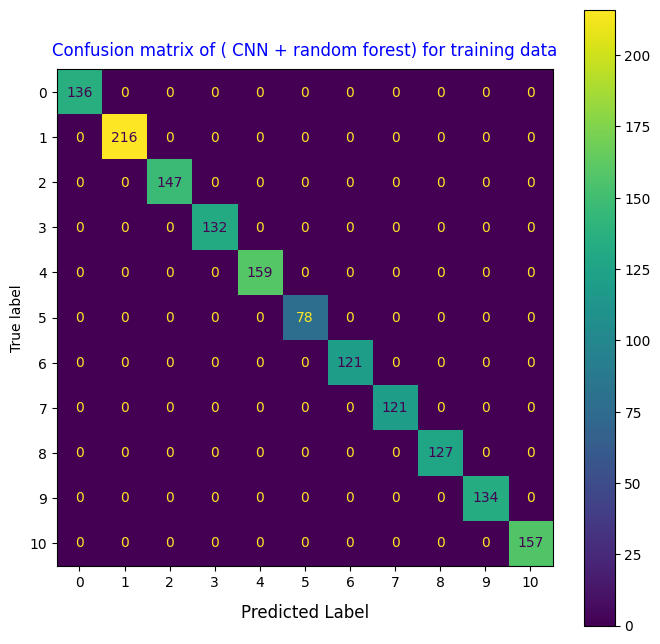

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a random forest classifier without handling class imbalance
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the feature matrix and transformed target variable
random_forest_model.fit(fullfeat, aa_reshaped)

# Make predictions on the feature matrix
rf_pred = random_forest_model.predict(fullfeat)

# Calculate the confusion matrix for the random forest predictions
random_forest_cf_matrix = confusion_matrix(aa_reshaped, rf_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=random_forest_cf_matrix)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)  # Plot confusion matrix on the specified axis

# Add xlabel above the confusion matrix
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of ( CNN + random forest) for training data", fontsize=12, pad=10, color='blue')
plt.show()


In [ ]:



# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
history1 = random_forest_model.fit(fullfeat, aa_reshaped)


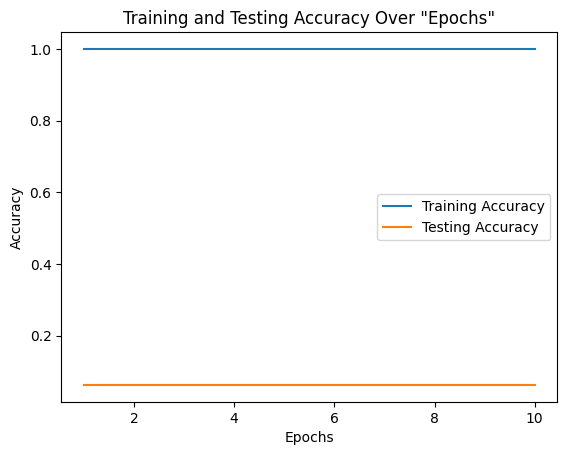

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have features in X_train and labels in y_train for training
# and tfullfeat, taa_reshaped for testing
# Replace these with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fullfeat, aa_reshaped, test_size=0.2, random_state=42)
tX_train, tX_test, ty_train, ty_test = train_test_split(tfullfeat, taa_reshaped, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store accuracy for both training and testing
train_accuracies = []
test_accuracies = []

# Train the model on the training set and record accuracy at each stage
for epoch in range(10):  # Assuming you want to simulate 10 "epochs"
    random_forest_model.fit(X_train, y_train)

    # Calculate and store training accuracy
    train_accuracy = random_forest_model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Calculate and store testing accuracy
    test_accuracy = random_forest_model.score(tX_test, ty_test)
    test_accuracies.append(test_accuracy)

# Plot both training and testing accuracy on the same plot
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 11), test_accuracies, label='Testing Accuracy')
plt.title('Training and Testing Accuracy Over "Epochs"')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



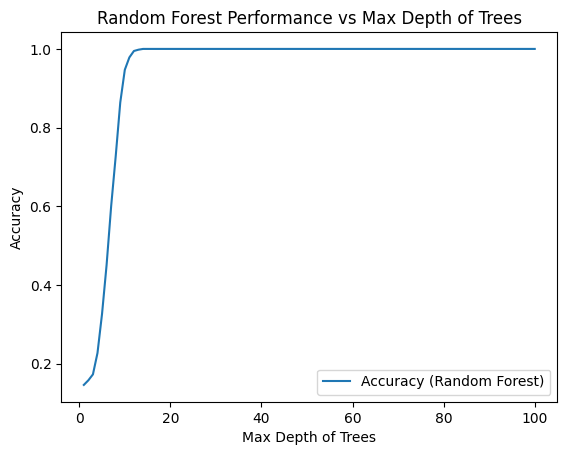

Max Depth=1: Learning Time = 0.2932 seconds, Accuracy = 0.1459
Max Depth=2: Learning Time = 0.3521 seconds, Accuracy = 0.1577
Max Depth=3: Learning Time = 0.4426 seconds, Accuracy = 0.1728
Max Depth=4: Learning Time = 0.6718 seconds, Accuracy = 0.2271
Max Depth=5: Learning Time = 0.7901 seconds, Accuracy = 0.3266
Max Depth=6: Learning Time = 0.5677 seconds, Accuracy = 0.4509
Max Depth=7: Learning Time = 0.6153 seconds, Accuracy = 0.6001
Max Depth=8: Learning Time = 0.7011 seconds, Accuracy = 0.7271
Max Depth=9: Learning Time = 0.5256 seconds, Accuracy = 0.8639
Max Depth=10: Learning Time = 0.5335 seconds, Accuracy = 0.9470


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt

# Assuming you have features in X_train and labels in y_train
# Replace these with your actual data

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# List to store performance metric (accuracy) and learning time for different values of the independent variable (max_depth)
performance_metric_rf = []
learning_time_rf = []

# Vary the maximum depth of the trees over a range of values
for max_depth in range(1, 101):
    rf_model.set_params(max_depth=max_depth)

    # Measure learning time
    start_time = time.time()

    # Fit the Random Forest model
    rf_model.fit(fullfeat, aa_reshaped)

    # Calculate learning time
    elapsed_time = time.time() - start_time
    learning_time_rf.append(elapsed_time)

    # Calculate accuracy
    accuracy = rf_model.score(fullfeat, aa_reshaped)
    performance_metric_rf.append(accuracy)

# Plot the performance metric (accuracy) over the range of the independent variable (max_depth)
plt.plot(range(1, 101), performance_metric_rf, label='Accuracy (Random Forest)')
plt.title('Random Forest Performance vs Max Depth of Trees')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display learning time for each max_depth value
for i, max_depth in enumerate(range(1, 11)):
    print(f"Max Depth={max_depth}: Learning Time = {learning_time_rf[i]:.4f} seconds, Accuracy = {performance_metric_rf[i]:.4f}")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(fullfeat, aa_reshaped, test_size=0.2, random_state=4)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
rf_test_pred = random_forest_model.predict(X_test)

# Calculate and print accuracy on the test set
accuracy_test = accuracy_score(y_test, rf_test_pred)
print(f'Test Accuracy: {accuracy_test:.2%}')


Test Accuracy: 13.07%


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
accuracy_scores = cross_val_score(random_forest_model, fullfeat, aa_reshaped, cv=5)

# Print average accuracy and standard deviation
print(f'Average Cross-Validation Accuracy: {accuracy_scores.mean():.2%}')
print(f'Standard Deviation: {accuracy_scores.std():.4f}')


Average Cross-Validation Accuracy: 10.21%
Standard Deviation: 0.0159


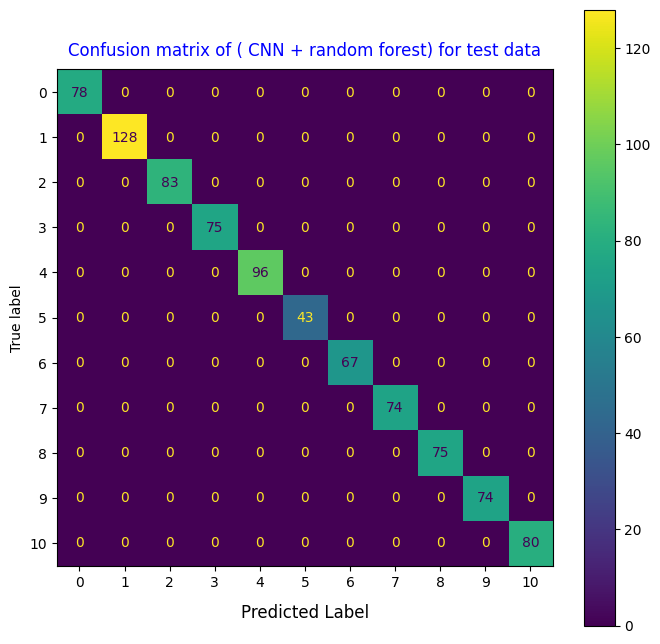

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a random forest classifier without handling class imbalance
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the feature matrix and transformed target variable
random_forest_model.fit(tfullfeat, taa_reshaped)

# Make predictions on the feature matrix
rf_pred = random_forest_model.predict(tfullfeat)

# Calculate the confusion matrix for the random forest predictions
random_forest_cf_matrix = confusion_matrix(taa_reshaped, rf_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=random_forest_cf_matrix)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)  # Plot confusion matrix on the specified axis

# Add xlabel above the confusion matrix
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of ( CNN + random forest) for test data", fontsize=12, pad=10, color='blue')
plt.show()




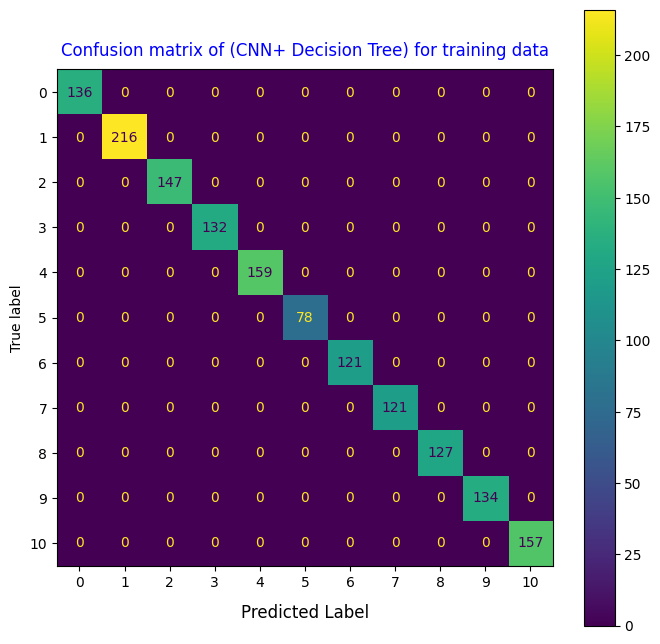

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a decision tree classifier without handling class imbalance
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the feature matrix and transformed target variable
decision_tree_model.fit(fullfeat, aa_reshaped)

# Make predictions on the feature matrix
dt_pred = decision_tree_model.predict(fullfeat)

# Calculate the confusion matrix for the decision tree predictions
decision_tree_cf_matrix = confusion_matrix(aa_reshaped, dt_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_cf_matrix)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)  # Plot confusion matrix on the specified axis

# Add xlabel above the confusion matrix
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of (CNN+ Decision Tree) for training data", fontsize=12, pad=10, color='blue')
plt.show()



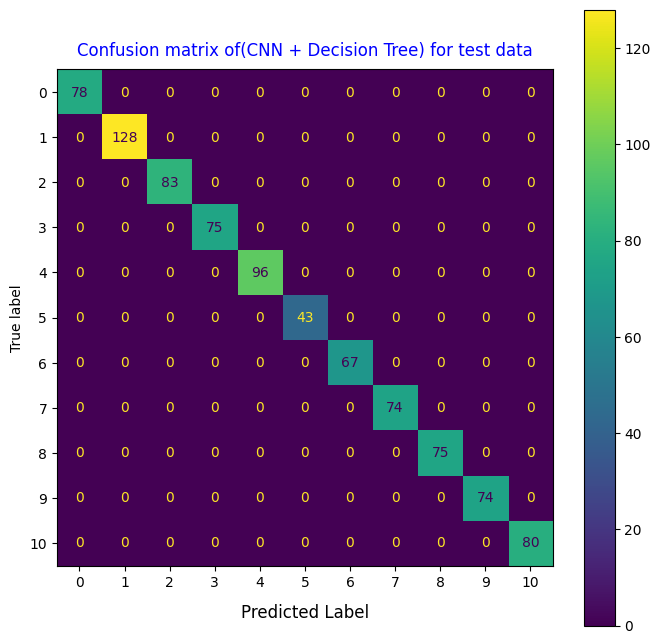

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a decision tree classifier without handling class imbalance
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the feature matrix and transformed target variable
decision_tree_model.fit(tfullfeat, taa_reshaped)

# Make predictions on the feature matrix
dt_pred = decision_tree_model.predict(tfullfeat)

# Calculate the confusion matrix for the decision tree predictions
decision_tree_cf_matrix = confusion_matrix(taa_reshaped, dt_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_cf_matrix)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)  # Plot confusion matrix on the specified axis

# Add xlabel above the confusion matrix
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of(CNN + Decision Tree) for test data", fontsize=12, pad=10, color='blue')
plt.show()


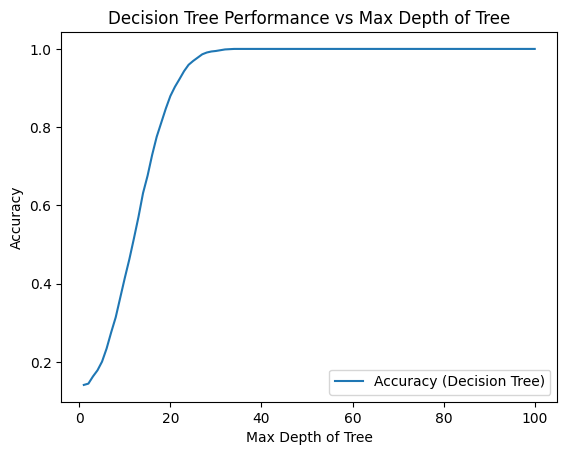

Max Depth=1: Learning Time = 0.0192 seconds, Accuracy = 0.1414
Max Depth=2: Learning Time = 0.0181 seconds, Accuracy = 0.1446
Max Depth=3: Learning Time = 0.0205 seconds, Accuracy = 0.1630
Max Depth=4: Learning Time = 0.0220 seconds, Accuracy = 0.1787
Max Depth=5: Learning Time = 0.0272 seconds, Accuracy = 0.2009
Max Depth=6: Learning Time = 0.0312 seconds, Accuracy = 0.2343
Max Depth=7: Learning Time = 0.0348 seconds, Accuracy = 0.2755
Max Depth=8: Learning Time = 0.0394 seconds, Accuracy = 0.3141
Max Depth=9: Learning Time = 0.0438 seconds, Accuracy = 0.3645
Max Depth=10: Learning Time = 0.0463 seconds, Accuracy = 0.4149
Max Depth=11: Learning Time = 0.0524 seconds, Accuracy = 0.4627
Max Depth=12: Learning Time = 0.0560 seconds, Accuracy = 0.5157
Max Depth=13: Learning Time = 0.0590 seconds, Accuracy = 0.5707
Max Depth=14: Learning Time = 0.0576 seconds, Accuracy = 0.6315
Max Depth=15: Learning Time = 0.0610 seconds, Accuracy = 0.6760
Max Depth=16: Learning Time = 0.0693 seconds, Acc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
import matplotlib.pyplot as plt

# Assuming you have features in X_train and labels in y_train
# Replace these with your actual data

# Initialize a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# List to store performance metric (accuracy) and learning time for different values of the independent variable (max_depth)
performance_metric_dt = []
learning_time_dt = []

# Vary the maximum depth of the tree over a range of values
for max_depth in range(1, 101):
    dt_model.set_params(max_depth=max_depth)

    # Measure learning time
    start_time = time.time()

    # Fit the Decision Tree model
    dt_model.fit(fullfeat, aa_reshaped)

    # Calculate learning time
    elapsed_time = time.time() - start_time
    learning_time_dt.append(elapsed_time)

    # Calculate accuracy
    accuracy = dt_model.score(fullfeat, aa_reshaped)
    performance_metric_dt.append(accuracy)

# Plot the performance metric (accuracy) over the range of the independent variable (max_depth)
plt.plot(range(1, 101), performance_metric_dt, label='Accuracy (Decision Tree)')
plt.title('Decision Tree Performance vs Max Depth of Tree')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display learning time for each max_depth value
for i, max_depth in enumerate(range(1, 101)):
    print(f"Max Depth={max_depth}: Learning Time = {learning_time_dt[i]:.4f} seconds, Accuracy = {performance_metric_dt[i]:.4f}")


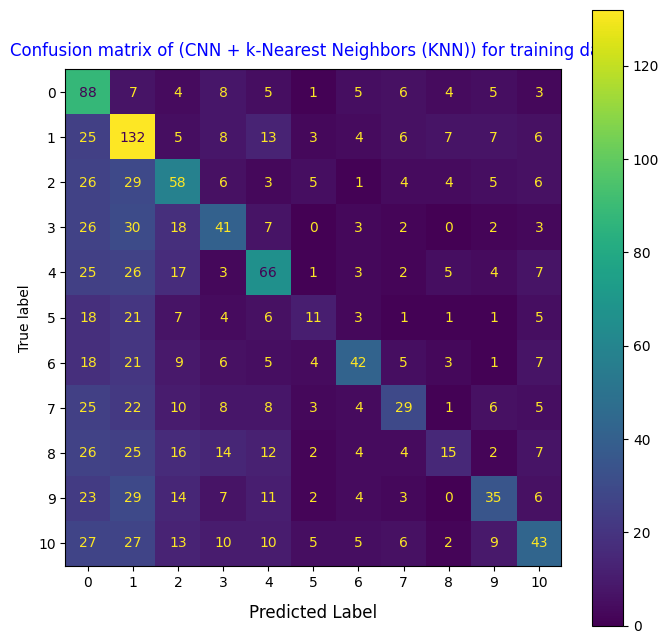

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on the feature matrix and transformed target variable
knn_model.fit(fullfeat, aa_reshaped)

# Make predictions on the feature matrix
knn_pred = knn_model.predict(fullfeat)

# Calculate the confusion matrix for the KNN predictions
knn_cf_matrix = confusion_matrix(aa_reshaped, knn_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cf_matrix)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)  # Plot confusion matrix on the specified axis

# Add xlabel above the confusion matrix
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of (CNN + k-Nearest Neighbors (KNN)) for training data", fontsize=12, pad=10, color='blue')
plt.show()


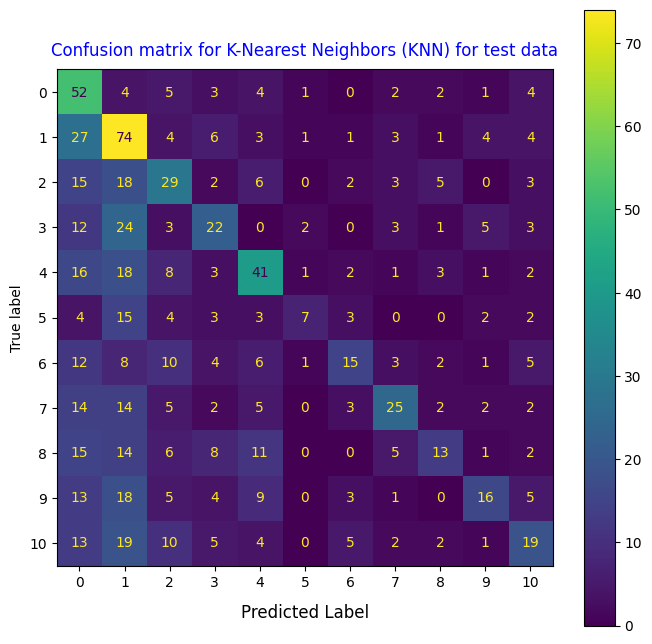

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on the feature matrix and transformed target variable
knn_model.fit(tfullfeat, taa_reshaped)

# Make predictions on the feature matrix
knn_pred = knn_model.predict(tfullfeat)

# Calculate the confusion matrix for the KNN predictions
knn_cf_matrix = confusion_matrix(taa_reshaped, knn_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cf_matrix)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)  # Plot confusion matrix on the specified axis

# Add xlabel above the confusion matrix
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix for K-Nearest Neighbors (KNN) for test data", fontsize=12, pad=10, color='blue')
plt.show()


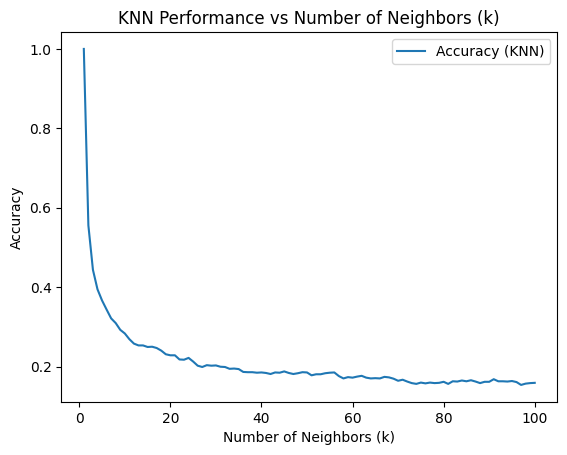

Number of Neighbors (k)=1: Learning Time = 0.0030 seconds, Accuracy = 1.0000
Number of Neighbors (k)=2: Learning Time = 0.0018 seconds, Accuracy = 0.5556
Number of Neighbors (k)=3: Learning Time = 0.0023 seconds, Accuracy = 0.4437
Number of Neighbors (k)=4: Learning Time = 0.0048 seconds, Accuracy = 0.3946
Number of Neighbors (k)=5: Learning Time = 0.0021 seconds, Accuracy = 0.3665
Number of Neighbors (k)=6: Learning Time = 0.0021 seconds, Accuracy = 0.3436
Number of Neighbors (k)=7: Learning Time = 0.0019 seconds, Accuracy = 0.3213
Number of Neighbors (k)=8: Learning Time = 0.0019 seconds, Accuracy = 0.3096
Number of Neighbors (k)=9: Learning Time = 0.0020 seconds, Accuracy = 0.2925
Number of Neighbors (k)=10: Learning Time = 0.0019 seconds, Accuracy = 0.2834
Number of Neighbors (k)=11: Learning Time = 0.0075 seconds, Accuracy = 0.2690
Number of Neighbors (k)=12: Learning Time = 0.0020 seconds, Accuracy = 0.2579
Number of Neighbors (k)=13: Learning Time = 0.0018 seconds, Accuracy = 0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
import matplotlib.pyplot as plt

# Assuming you have features in X_train and labels in y_train
# Replace these with your actual data

# Initialize a KNN classifier
knn_model = KNeighborsClassifier()

# List to store performance metric (accuracy) and learning time for different values of the independent variable (k)
performance_metric_knn = []
learning_time_knn = []

# Vary the number of neighbors (k) over a range of values
for k in range(1, 101):
    knn_model.set_params(n_neighbors=k)

    # Measure learning time
    start_time = time.time()

    # Fit the KNN model
    knn_model.fit(fullfeat, aa_reshaped)

    # Calculate learning time
    elapsed_time = time.time() - start_time
    learning_time_knn.append(elapsed_time)

    # Calculate accuracy
    accuracy = knn_model.score(fullfeat, aa_reshaped)
    performance_metric_knn.append(accuracy)

# Plot the performance metric (accuracy) over the range of the independent variable (k)
plt.plot(range(1, 101), performance_metric_knn, label='Accuracy (KNN)')
plt.title('KNN Performance vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display learning time for each k value
for i, k in enumerate(range(1, 101)):
    print(f"Number of Neighbors (k)={k}: Learning Time = {learning_time_knn[i]:.4f} seconds, Accuracy = {performance_metric_knn[i]:.4f}")



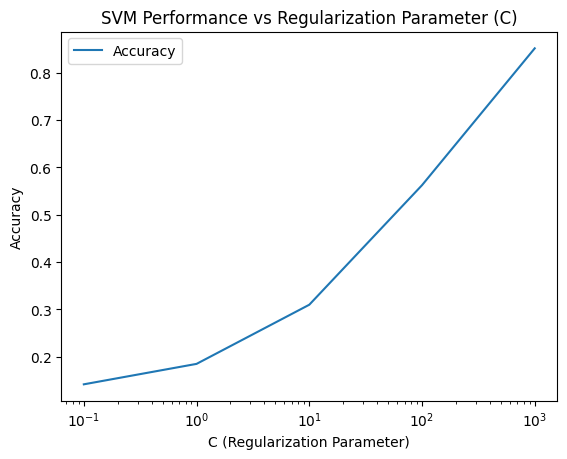

C=0.1: Learning Time = 0.2920 seconds, Accuracy = 0.1414
C=1: Learning Time = 0.4000 seconds, Accuracy = 0.1846
C=10: Learning Time = 0.3525 seconds, Accuracy = 0.3096
C=100: Learning Time = 0.8057 seconds, Accuracy = 0.5622
C=1000: Learning Time = 2.2518 seconds, Accuracy = 0.8514


In [ ]:
from sklearn.svm import SVC
import time
import matplotlib.pyplot as plt

# Assuming you have features in X_train and labels in y_train
# Replace these with your actual data

# Initialize an SVM classifier
svm_model = SVC(random_state=42)

# List to store performance metric (accuracy) and learning time for different values of the independent variable (C)
performance_metric = []
learning_time = []

# Vary the regularization parameter (C) over a range of values
for C_value in [0.1, 1, 10, 100, 1000]:
    svm_model.set_params(C=C_value)

    # Measure learning time
    start_time = time.time()

    # Fit the SVM model
    svm_model.fit(fullfeat, aa_reshaped)

    # Calculate learning time
    elapsed_time = time.time() - start_time
    learning_time.append(elapsed_time)

    # Calculate accuracy
    accuracy = svm_model.score(fullfeat, aa_reshaped)
    performance_metric.append(accuracy)

# Plot the performance metric (accuracy) over the range of the independent variable (C)
plt.plot([0.1, 1, 10, 100, 1000], performance_metric, label='Accuracy')
plt.title('SVM Performance vs Regularization Parameter (C)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.xscale('log')  # Using log scale for better visualization
plt.legend()
plt.show()

# Display learning time for each C value
for i, C_value in enumerate([0.1, 1, 10, 100, 1000]):
    print(f"C={C_value}: Learning Time = {learning_time[i]:.4f} seconds, Accuracy = {performance_metric[i]:.4f}")



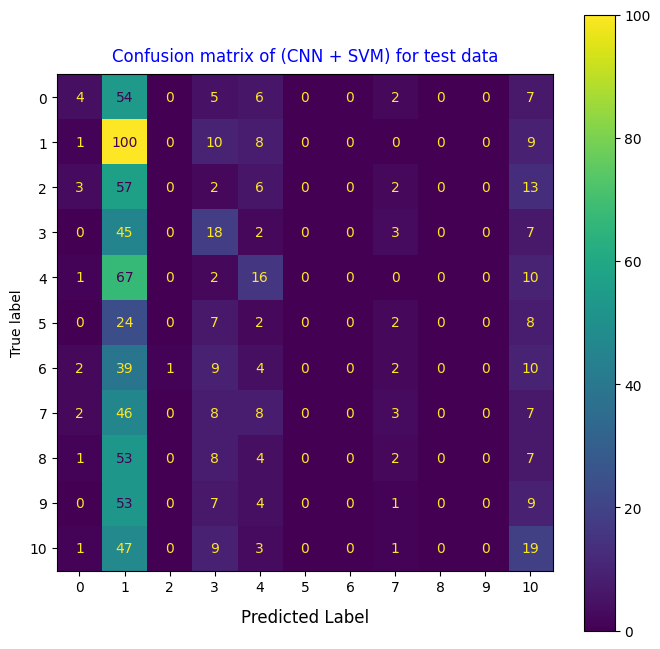

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an SVM classifier
svm_model = SVC(random_state=42)

# Train the SVM model on the feature matrix and transformed target variable
svm_model.fit(tfullfeat, taa_reshaped)

# Make predictions on the feature matrix using SVM for the test data
svm_pred = svm_model.predict(tfullfeat)

# Calculate the confusion matrix for SVM predictions on the test data
svm_cf_matrix = confusion_matrix(taa_reshaped, svm_pred)

# Create a ConfusionMatrixDisplay object for SVM on the test data
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix=svm_cf_matrix)

# Plot the confusion matrix for SVM on the test data
fig, ax = plt.subplots(figsize=(8, 8))
svm_cm_display.plot(ax=ax)

# Add xlabel above the confusion matrix for SVM on the test data
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of (CNN + SVM) for test data", fontsize=12, pad=10, color='blue')
plt.show()


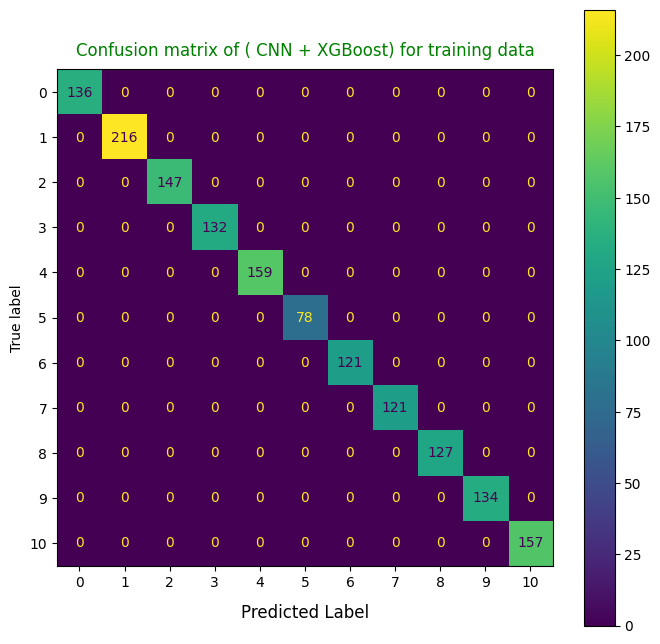

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the XGBoost model on the feature matrix and transformed target variable
xgb_model.fit(fullfeat, aa_reshaped)

# Make predictions on the feature matrix using XGBoost
xgb_pred = xgb_model.predict(fullfeat)

# Calculate the confusion matrix for XGBoost predictions
xgb_cf_matrix = confusion_matrix(aa_reshaped, xgb_pred)

# Create a ConfusionMatrixDisplay object for XGBoost
xgb_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cf_matrix)

# Plot the confusion matrix for XGBoost
fig, ax = plt.subplots(figsize=(8, 8))
xgb_cm_display.plot(ax=ax)

# Add xlabel above the confusion matrix for XGBoost
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of ( CNN + XGBoost) for training data", fontsize=12, pad=10, color='green')
plt.show()


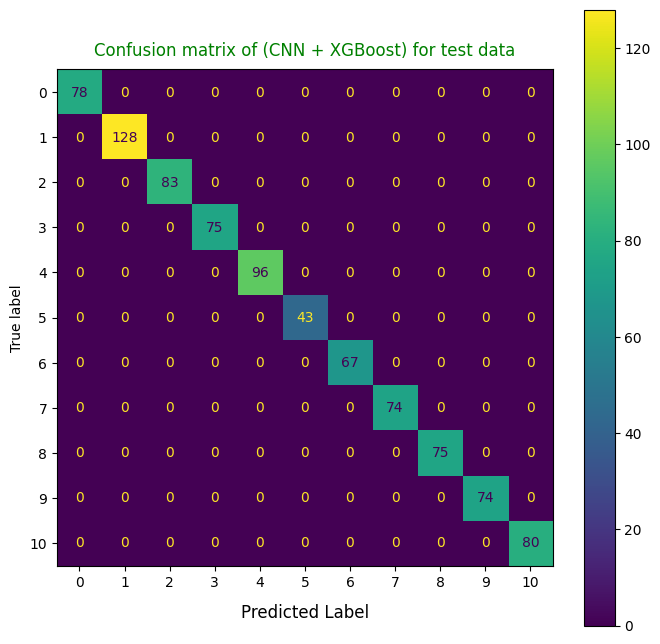

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the XGBoost model on the feature matrix and transformed target variable
xgb_model.fit(tfullfeat, taa_reshaped)

# Make predictions on the feature matrix using XGBoost for the test data
xgb_pred = xgb_model.predict(tfullfeat)

# Calculate the confusion matrix for XGBoost predictions on the test data
xgb_cf_matrix = confusion_matrix(taa_reshaped, xgb_pred)

# Create a ConfusionMatrixDisplay object for XGBoost on the test data
xgb_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cf_matrix)

# Plot the confusion matrix for XGBoost on the test data
fig, ax = plt.subplots(figsize=(8, 8))
xgb_cm_display.plot(ax=ax)

# Add xlabel above the confusion matrix for XGBoost on the test data
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.title("Confusion matrix of (CNN + XGBoost) for test data", fontsize=12, pad=10, color='green')
plt.show()


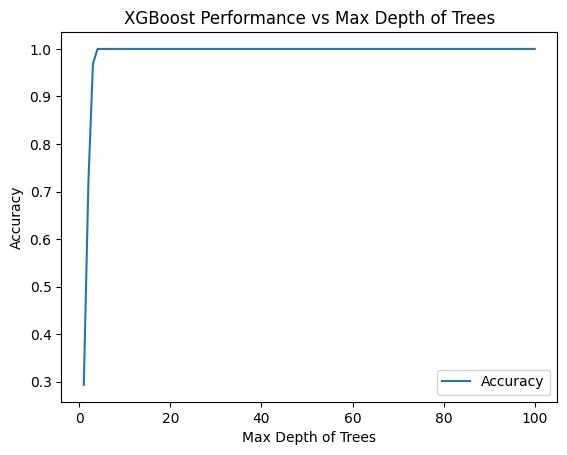

Max Depth=1: Learning Time = 0.6365 seconds, Accuracy = 0.2932
Max Depth=2: Learning Time = 1.5088 seconds, Accuracy = 0.7179
Max Depth=3: Learning Time = 1.9274 seconds, Accuracy = 0.9686
Max Depth=4: Learning Time = 1.5260 seconds, Accuracy = 1.0000
Max Depth=5: Learning Time = 2.1301 seconds, Accuracy = 1.0000
Max Depth=6: Learning Time = 4.5280 seconds, Accuracy = 1.0000
Max Depth=7: Learning Time = 2.9282 seconds, Accuracy = 1.0000
Max Depth=8: Learning Time = 3.2114 seconds, Accuracy = 1.0000
Max Depth=9: Learning Time = 4.1649 seconds, Accuracy = 1.0000
Max Depth=10: Learning Time = 8.3355 seconds, Accuracy = 1.0000
Max Depth=11: Learning Time = 6.2120 seconds, Accuracy = 1.0000
Max Depth=12: Learning Time = 3.5180 seconds, Accuracy = 1.0000
Max Depth=13: Learning Time = 3.4821 seconds, Accuracy = 1.0000
Max Depth=14: Learning Time = 5.4251 seconds, Accuracy = 1.0000
Max Depth=15: Learning Time = 3.4743 seconds, Accuracy = 1.0000
Max Depth=16: Learning Time = 3.4979 seconds, Acc

In [ ]:
from xgboost import XGBClassifier
import time
import matplotlib.pyplot as plt

# Assuming you have features in X_train and labels in y_train
# Replace these with your actual data

# Initialize an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# List to store performance metric (accuracy) and learning time for different values of the independent variable (max_depth)
performance_metric = []
learning_time = []

# Vary the maximum depth of the trees over a range of values
for max_depth in range(1, 101):
    xgb_model.set_params(max_depth=max_depth)

    # Measure learning time
    start_time = time.time()

    # Fit the XGBoost model
    xgb_model.fit(fullfeat, aa_reshaped)

    # Calculate learning time
    elapsed_time = time.time() - start_time
    learning_time.append(elapsed_time)

    # Calculate accuracy
    accuracy = xgb_model.score(fullfeat, aa_reshaped)
    performance_metric.append(accuracy)

# Plot the performance metric (accuracy) over the range of the independent variable (max_depth)
plt.plot(range(1, 101), performance_metric, label='Accuracy')
plt.title('XGBoost Performance vs Max Depth of Trees')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display learning time for each max_depth value
for i, max_depth in enumerate(range(1, 101)):
    print(f"Max Depth={max_depth}: Learning Time = {learning_time[i]:.4f} seconds, Accuracy = {performance_metric[i]:.4f}")



In [ ]:
rf_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [ ]:
dt_pred


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [ ]:
knn_pred

array([ 0,  2,  1,  0,  0,  8,  0,  0,  0,  0,  0,  7,  0,  0,  3,  7,  0,
        0,  0,  0,  0,  4,  1,  0,  0,  8,  0,  0,  0,  0, 10,  0,  0,  0,
        0,  0,  3,  0,  4,  1,  2,  0,  0,  4, 10, 10,  0,  0,  0,  4,  0,
        0,  0,  9,  0,  2,  0,  0,  0,  0,  0,  1,  5,  0,  0,  0,  0,  0,
        0,  0, 10,  2,  0,  2,  0,  0,  3,  0,  2,  9,  1,  0,  1,  1,  1,
        1,  1,  0,  1,  0,  0,  1,  1,  0,  7,  2,  0,  1,  0,  1,  1,  1,
        0,  2,  0,  1,  1,  1, 10,  1,  1,  1,  0,  0,  1,  1,  1,  4,  1,
        1,  1,  1,  9,  1,  1,  1,  0,  1,  1,  0,  1,  6,  0,  1,  3,  1,
        1,  0,  1,  1, 10,  0,  0,  1,  0,  7,  1,  3,  1,  1,  1,  5,  0,
        1,  1,  1,  1,  1,  1, 10,  0,  0,  1,  1,  4,  0,  1,  1,  1,  3,
        3,  1,  9,  0,  0,  1,  1,  1,  1,  9,  2,  0,  1,  1,  1,  8,  1,
        1,  3,  1,  1,  1,  0,  3,  0,  1, 10,  1,  1,  7,  1,  4,  1,  1,
        1,  1,  0,  1,  2,  0,  4,  1,  0,  0,  2,  2,  2,  1,  1,  7,  2,
        8,  7,  2,  1,  0

In [ ]:
svm_pred

array([ 3,  1,  1,  1,  4,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,
        0,  1,  4,  1,  1,  1,  1,  4,  1,  3,  1,  1,  1, 10,  1, 10,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1, 10,  1,  1,  1,  7,
        1,  1,  1,  1,  0,  3,  1,  1,  1,  7,  1, 10,  1,  0,  1,  1,  1,
        1,  4, 10, 10,  1,  1,  1,  1,  3,  4,  1,  1,  1,  1,  1, 10,  1,
        1,  1,  1,  4,  1,  1,  1,  1,  1,  4,  1,  1, 10,  0,  1,  1,  1,
        1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,
        1, 10,  1,  1,  1,  1, 10,  4,  1,  1,  1,  1, 10,  1,  1,  3, 10,
        1,  1,  1,  1,  3,  1,  1,  1,  1,  3,  1,  1,  3,  1,  1,  1,  1,
       10,  1,  1,  1,  1,  4,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        3,  1,  1,  1,  4,  1,  1,  1,  3,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,
        1, 10,  1,  1,  4,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  3, 10,
        1,  1, 10,  1,  1

In [ ]:
print("Unique true labels in aa_reshaped:", set(aa_reshaped))
print("Unique predicted labels in svm_pred:", set(svm_pred))


Unique true labels in aa_reshaped: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Unique predicted labels in svm_pred: {0, 1, 2, 3, 4, 7, 10}


In [ ]:
xgb_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [ ]:
classes

['Avulsion fracture',
 'Comminuted fracture',
 'Compression-Crush fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Intra-articular fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture',
 'Fracture Dislocation']

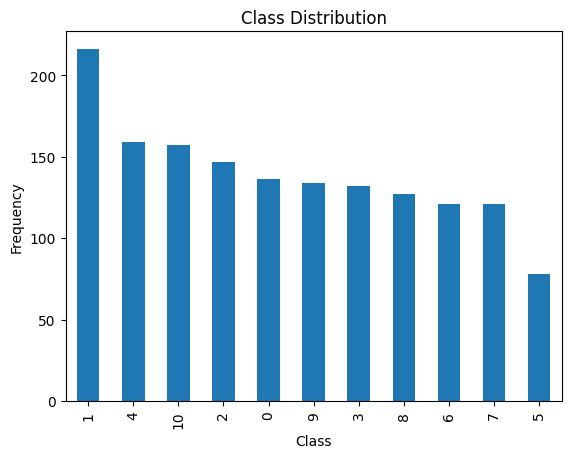

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'target' is your target variable
# Calculate class distribution
class_distribution = pd.Series(aa).value_counts()

# Plotting class distribution
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [ ]:
# Check the shapes of 'fullfeat' and 'aa_length_array'
print("Shape of fullfeat:", np.array(fullfeat).shape)
print("Shape of aa_length_array:", aa_reshaped.shape)


Shape of fullfeat: (1528, 22)
Shape of aa_length_array: (1528,)


In [ ]:
# Check the shapes of 'fullfeat' and 'aa_length_array'
print("Shape of tfullfeat:", np.array(tfullfeat).shape)
print("Shape of taa_length_array:", taa_reshaped.shape)

Shape of tfullfeat: (873, 22)
Shape of taa_length_array: (873,)


<Axes: >

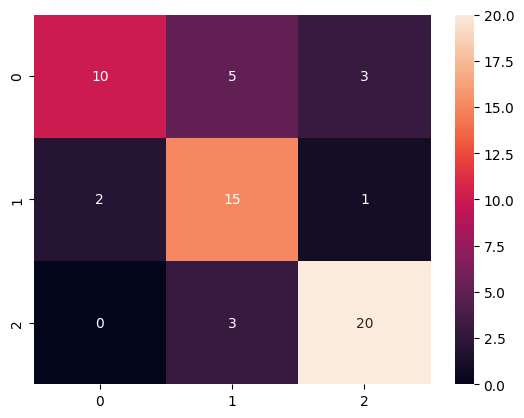

In [ ]:
import seaborn as sns
import numpy as np  # Assuming cf_matrix is a numpy array

# Define cf_matrix (replace this with your actual confusion matrix)
cf_matrix = np.array([[10, 5, 3],
                      [2, 15, 1],
                      [0, 3, 20]])

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix, annot=True)


In [ ]:
print(classification_report(rf_pred,taa, target_names=classes))

                            precision    recall  f1-score   support

         Avulsion fracture       1.00      1.00      1.00        78
       Comminuted fracture       1.00      1.00      1.00       128
Compression-Crush fracture       1.00      1.00      1.00        83
         Hairline Fracture       1.00      1.00      1.00        75
         Impacted fracture       1.00      1.00      1.00        96
  Intra-articular fracture       1.00      1.00      1.00        43
     Longitudinal fracture       1.00      1.00      1.00        67
          Oblique fracture       1.00      1.00      1.00        74
     Pathological fracture       1.00      1.00      1.00        75
           Spiral Fracture       1.00      1.00      1.00        74
      Fracture Dislocation       1.00      1.00      1.00        80

                  accuracy                           1.00       873
                 macro avg       1.00      1.00      1.00       873
              weighted avg       1.00      1.0

In [ ]:
print(classification_report(dt_pred,taa, target_names=classes))

                            precision    recall  f1-score   support

         Avulsion fracture       1.00      1.00      1.00        78
       Comminuted fracture       1.00      1.00      1.00       128
Compression-Crush fracture       1.00      1.00      1.00        83
         Hairline Fracture       1.00      1.00      1.00        75
         Impacted fracture       1.00      1.00      1.00        96
  Intra-articular fracture       1.00      1.00      1.00        43
     Longitudinal fracture       1.00      1.00      1.00        67
          Oblique fracture       1.00      1.00      1.00        74
     Pathological fracture       1.00      1.00      1.00        75
           Spiral Fracture       1.00      1.00      1.00        74
      Fracture Dislocation       1.00      1.00      1.00        80

                  accuracy                           1.00       873
                 macro avg       1.00      1.00      1.00       873
              weighted avg       1.00      1.0

In [ ]:
print(classification_report(knn_pred,taa, target_names=classes))

                            precision    recall  f1-score   support

         Avulsion fracture       0.67      0.27      0.38       193
       Comminuted fracture       0.58      0.33      0.42       226
Compression-Crush fracture       0.35      0.33      0.34        89
         Hairline Fracture       0.29      0.35      0.32        62
         Impacted fracture       0.43      0.45      0.44        92
  Intra-articular fracture       0.16      0.54      0.25        13
     Longitudinal fracture       0.22      0.44      0.30        34
          Oblique fracture       0.34      0.52      0.41        48
     Pathological fracture       0.17      0.42      0.25        31
           Spiral Fracture       0.22      0.47      0.30        34
      Fracture Dislocation       0.24      0.37      0.29        51

                  accuracy                           0.36       873
                 macro avg       0.33      0.41      0.33       873
              weighted avg       0.46      0.3

In [ ]:
print(classification_report(svm_pred,taa, target_names=classes))

                            precision    recall  f1-score   support

         Avulsion fracture       0.05      0.27      0.09        15
       Comminuted fracture       0.78      0.17      0.28       585
Compression-Crush fracture       0.00      0.00      0.00         1
         Hairline Fracture       0.24      0.21      0.22        85
         Impacted fracture       0.17      0.25      0.20        63
  Intra-articular fracture       0.00      0.00      0.00         0
     Longitudinal fracture       0.00      0.00      0.00         0
          Oblique fracture       0.04      0.17      0.07        18
     Pathological fracture       0.00      0.00      0.00         0
           Spiral Fracture       0.00      0.00      0.00         0
      Fracture Dislocation       0.24      0.18      0.20       106

                  accuracy                           0.18       873
                 macro avg       0.14      0.11      0.10       873
              weighted avg       0.59      0.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(xgb_pred,taa, target_names=classes))

                            precision    recall  f1-score   support

         Avulsion fracture       1.00      1.00      1.00        78
       Comminuted fracture       1.00      1.00      1.00       128
Compression-Crush fracture       1.00      1.00      1.00        83
         Hairline Fracture       1.00      1.00      1.00        75
         Impacted fracture       1.00      1.00      1.00        96
  Intra-articular fracture       1.00      1.00      1.00        43
     Longitudinal fracture       1.00      1.00      1.00        67
          Oblique fracture       1.00      1.00      1.00        74
     Pathological fracture       1.00      1.00      1.00        75
           Spiral Fracture       1.00      1.00      1.00        74
      Fracture Dislocation       1.00      1.00      1.00        80

                  accuracy                           1.00       873
                 macro avg       1.00      1.00      1.00       873
              weighted avg       1.00      1.0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'taa_reshaped' represents true labels and 'rf_pred' represents predicted labels
# Replace 'taa_reshaped' and 'rf_pred' with your actual true and predicted labels from your Random Forest model

# Check the shape of the arrays
print("Shape of taa_reshaped:", taa_reshaped.shape)
print("Shape of rf_pred:", rf_pred.shape)

# Calculate accuracy
accuracy = accuracy_score(taa_reshaped, rf_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(taa_reshaped, rf_pred, average='weighted')
recall = recall_score(taa_reshaped, rf_pred, average='weighted')
f1 = f1_score(taa_reshaped, rf_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(taa_reshaped, rf_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)



Shape of taa_reshaped: (873,)
Shape of rf_pred: (873,)
Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 78   0   0   0   0   0   0   0   0   0   0]
 [  0 128   0   0   0   0   0   0   0   0   0]
 [  0   0  83   0   0   0   0   0   0   0   0]
 [  0   0   0  75   0   0   0   0   0   0   0]
 [  0   0   0   0  96   0   0   0   0   0   0]
 [  0   0   0   0   0  43   0   0   0   0   0]
 [  0   0   0   0   0   0  67   0   0   0   0]
 [  0   0   0   0   0   0   0  74   0   0   0]
 [  0   0   0   0   0   0   0   0  75   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0  80]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'taa_reshaped' represents true labels and 'dt_pred' represents predicted labels
# Replace 'taa_reshaped' and 'dt_pred' with your actual true and predicted labels from your Decision Tree model

# Check the shape of the arrays
print("Shape of taa_reshaped:", taa_reshaped.shape)
print("Shape of dt_pred:", dt_pred.shape)

# Calculate accuracy
accuracy = accuracy_score(taa_reshaped, dt_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(taa_reshaped, dt_pred, average='weighted')
recall = recall_score(taa_reshaped, dt_pred, average='weighted')
f1 = f1_score(taa_reshaped, dt_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(taa_reshaped, dt_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Shape of taa_reshaped: (873,)
Shape of dt_pred: (873,)
Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 78   0   0   0   0   0   0   0   0   0   0]
 [  0 128   0   0   0   0   0   0   0   0   0]
 [  0   0  83   0   0   0   0   0   0   0   0]
 [  0   0   0  75   0   0   0   0   0   0   0]
 [  0   0   0   0  96   0   0   0   0   0   0]
 [  0   0   0   0   0  43   0   0   0   0   0]
 [  0   0   0   0   0   0  67   0   0   0   0]
 [  0   0   0   0   0   0   0  74   0   0   0]
 [  0   0   0   0   0   0   0   0  75   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0  80]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'taa_reshaped' represents true labels and 'knn_pred' represents predicted labels
# Replace 'taa_reshaped' and 'knn_pred' with your actual true and predicted labels from your KNN model

# Check the shape of the arrays
print("Shape of taa_reshaped:", taa_reshaped.shape)
print("Shape of knn_pred:", knn_pred.shape)

# Calculate accuracy
accuracy = accuracy_score(taa_reshaped, knn_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(taa_reshaped, knn_pred, average='weighted')
recall = recall_score(taa_reshaped, knn_pred, average='weighted')
f1 = f1_score(taa_reshaped, knn_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(taa_reshaped, knn_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Shape of taa_reshaped: (873,)
Shape of knn_pred: (873,)
Accuracy: 0.35853379152348225
Accuracy: 0.35853379152348225
Precision: 0.39713734758471414
Recall: 0.35853379152348225
F1 Score: 0.345822595133709
Confusion Matrix:
[[52  4  5  3  4  1  0  2  2  1  4]
 [27 74  4  6  3  1  1  3  1  4  4]
 [15 18 29  2  6  0  2  3  5  0  3]
 [12 24  3 22  0  2  0  3  1  5  3]
 [16 18  8  3 41  1  2  1  3  1  2]
 [ 4 15  4  3  3  7  3  0  0  2  2]
 [12  8 10  4  6  1 15  3  2  1  5]
 [14 14  5  2  5  0  3 25  2  2  2]
 [15 14  6  8 11  0  0  5 13  1  2]
 [13 18  5  4  9  0  3  1  0 16  5]
 [13 19 10  5  4  0  5  2  2  1 19]]
